# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
retail=pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 2. Exploratory Analysis

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
print(f'Missing values: \n{retail.isnull().sum()}')

Missing values: 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
print(f'Duplicated rows: \n{retail.duplicated().sum()}')

Duplicated rows: 
5268


In [6]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Initial impressions
- Description and CustomerID are the only features with missing values.
- There are negative or zero values for quantity and UnitPrice features.
- Data type for CustomerID should be string no float.
- There are 5269 duplicated row in the dataset.

## Task 3. Data Wrangling

In [7]:
#Drop duplicate rows
retail.drop_duplicates(inplace = True, ignore_index=True)

In [8]:
#Rows after drop duplicates
retail.shape

(536641, 8)

In [9]:
#convert CustomerID to string if the feature is not null
retail['CustomerID'] = retail['CustomerID'].apply(lambda x: str(x) if pd.notnull(x) else x)
#Replace 'nan' with np.nan values
retail['CustomerID'].replace(to_replace={'nan': np.nan}, inplace=True)

In [10]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.8+ MB


In [11]:
retail['Description'].fillna('MISCELLANEOUS', inplace=True)
retail['CustomerID'].fillna('UNKNOW', inplace = True)

In [12]:
#Missing values in Description and CustomerID
fields = ['Description', 'CustomerID']
print(f'Missing values:\n{retail[fields].isnull().sum()}')

Missing values:
Description    0
CustomerID     0
dtype: int64


In [13]:
#Create a new feature 'SalePrice' to calcule the price for each item sale
retail['SalePrice'] = np.round(retail['UnitPrice']*retail['Quantity'],2)

In [14]:
# Consider only transactions with UnitPrice and Quantity greater than zero.
retail = retail.query("UnitPrice > 0 and Quantity > 0")

In [15]:
#Group each transactions and calculate SalePrice
sales = retail.groupby(['InvoiceNo','InvoiceDate','CustomerID','Country']).agg({
    'Description' : 'unique',
    'SalePrice': 'sum'
}).reset_index()

In [16]:
sales.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,Description,SalePrice
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",139.12
1,536366,2010-12-01 08:28:00,17850.0,United Kingdom,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",22.20
2,536367,2010-12-01 08:34:00,13047.0,United Kingdom,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",278.73
3,536368,2010-12-01 08:34:00,13047.0,United Kingdom,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",70.05
4,536369,2010-12-01 08:35:00,13047.0,United Kingdom,[BATH BUILDING BLOCK WORD],17.85


In [17]:
#break down InvoiceDate to month, day anh hour
sales['Month'] = sales['InvoiceDate'].dt.month_name() 
sales['Day_name'] = sales['InvoiceDate'].dt.day_name()
sales['Hour'] = sales['InvoiceDate'].dt.hour

In [18]:
sales.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,Description,SalePrice,Month,Day_name,Hour
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",139.12,December,Wednesday,8
1,536366,2010-12-01 08:28:00,17850.0,United Kingdom,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",22.20,December,Wednesday,8
2,536367,2010-12-01 08:34:00,13047.0,United Kingdom,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",278.73,December,Wednesday,8
3,536368,2010-12-01 08:34:00,13047.0,United Kingdom,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",70.05,December,Wednesday,8
4,536369,2010-12-01 08:35:00,13047.0,United Kingdom,[BATH BUILDING BLOCK WORD],17.85,December,Wednesday,8


## Task 4. Data Visualization

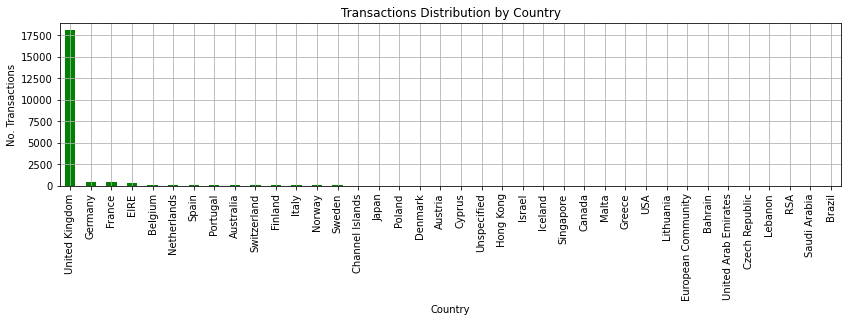

In [19]:
#Transactions distribution by Country
plt.figure(figsize=(14,3))
sales.groupby('Country')['SalePrice'].count().sort_values(ascending = False).plot(kind='bar', color ='g')
plt.ylabel('No. Transactions')
plt.title('Transactions Distribution by Country')
#plt.ylim(0,1)
plt.grid()
plt.show()

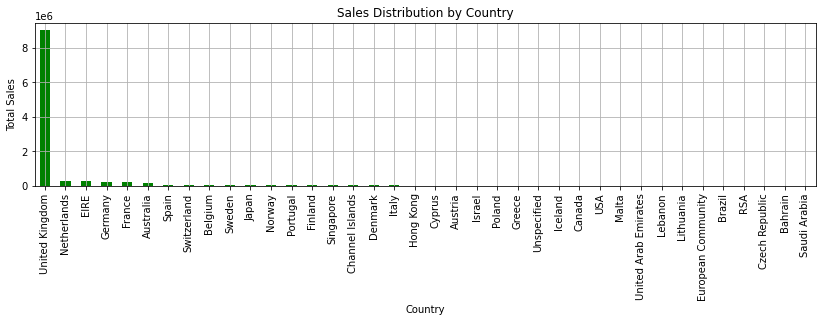

In [20]:
#Transactions distribution by Country
plt.figure(figsize=(14,3))
sales.groupby('Country')['SalePrice'].sum().sort_values(ascending = False).plot(kind='bar', color ='g')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Country')
plt.grid()
plt.show()

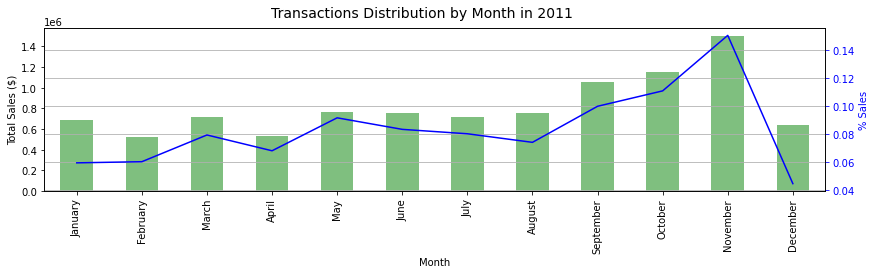

In [21]:
# Number of Trasactions an total sales distribution by month
fig, ax1 = plt.subplots(figsize=(14,3))

# Define the order of months for proper sorting (from January to December)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
R_m = sales[sales['InvoiceDate']>= pd.to_datetime('2011-1-1')]
#groupby 'Month', reindex monthly_sales and plot the bar chart
monthly_sales = R_m.groupby('Month')['SalePrice'].sum()
monthly_sales =monthly_sales.reindex(month_order)
monthly_sales.plot(kind='bar', color='g',alpha=0.5, ax=ax1)

#Create the second y-axis for the line chart
ax2 = ax1.twinx()

#groupby 'Month', reindex monthly_peercent and plot the line chart
monthly_percent = R_m['Month'].value_counts(normalize=True).sort_index()
monthly_percent=monthly_percent.reindex(month_order)
monthly_percent.plot(color='blue', ax=ax2)

ax1.set_ylabel('Total Sales ($)')
ax2.set_ylabel('% Sales', color ='blue')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
plt.grid()
fig.suptitle('Transactions Distribution by Month in 2011', fontsize=14)
plt.show()

In [65]:
#comparisson between dec 2010 and dec 2011
sales['Year'] =sales['InvoiceDate'].dt.year
sales_december = sales[sales['Month']=='December']
aggregated_data = sales_december.groupby('Year')['SalePrice'].agg(['count', 'sum']).reset_index()
aggregated_data

,Year,count,sum
0,2010,1560,821452.73
1,2011,819,637790.33


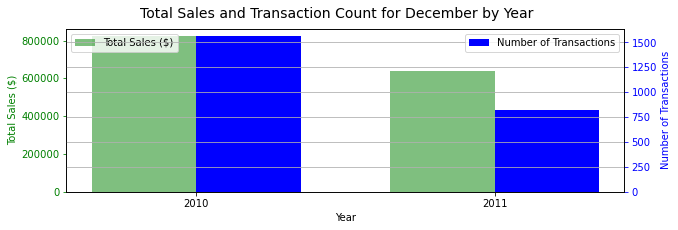

In [63]:
fig, ax1 = plt.subplots(figsize=(10, 3))
bar_width = 0.35

# Set the positions for the bars (side by side for each Year)
index = aggregated_data['Year']

bars1 = ax1.bar(index - bar_width / 2, aggregated_data[('sum')], bar_width, label='Total Sales ($)', color='g', alpha=0.5)
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width / 2, aggregated_data[('count')], bar_width, label='Number of Transactions', color='b')

ax1.set_ylabel('Total Sales ($)', color='g')
ax2.set_ylabel('Number of Transactions', color='b')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', colors='green')
ax2.tick_params(axis='y', colors='blue')
fig.suptitle('Total Sales and Transaction Count for December by Year', fontsize=14)
ax1.set_xticks([2010, 2011])
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid()
plt.show()


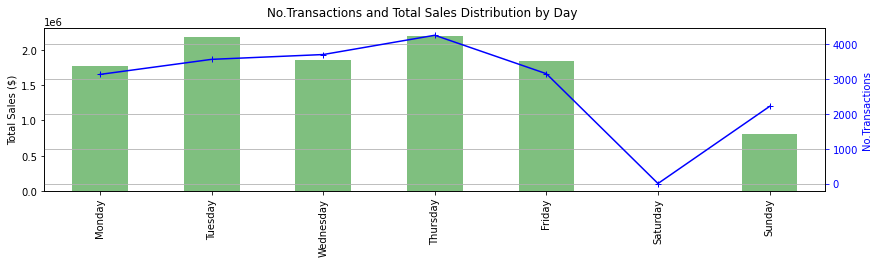

In [24]:
# Transactions distribution by day - there isnt transactions on saturday
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']

fig, ax1 = plt.subplots(figsize=(14,3))
sales.groupby('Day_name')['SalePrice'].sum().reindex(cats, fill_value=0).plot(kind='bar', color='g', alpha=0.5,  ax=ax1)
ax2 = ax1.twinx()
sales.groupby('Day_name')['SalePrice'].count().reindex(cats, fill_value=0).plot(color='b', marker ='+', ax=ax2)

ax1.set_ylabel('Total Sales ($)')
ax1.set_xlabel('')
ax2.set_ylabel('No.Transactions')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
plt.grid()
fig.suptitle('No.Transactions and Total Sales Distribution by Day')
plt.show()

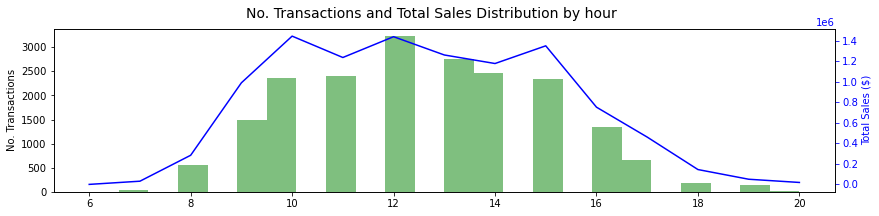

In [25]:
#Transactions distribution by hour
fig, ax1 = plt.subplots(figsize=(14,3))
sales['Hour'].plot(kind='hist', bins = 24, color='g',alpha=0.5, ax=ax1)
ax2 = ax1.twinx()
sales.groupby('Hour')['SalePrice'].sum().plot(color='b', ax = ax2)
ax1.set_ylabel('No. Transactions')
ax2.set_ylabel('Total Sales ($)')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
fig.suptitle('No. Transactions and Total Sales Distribution by hour', fontsize = 14)

plt.show()

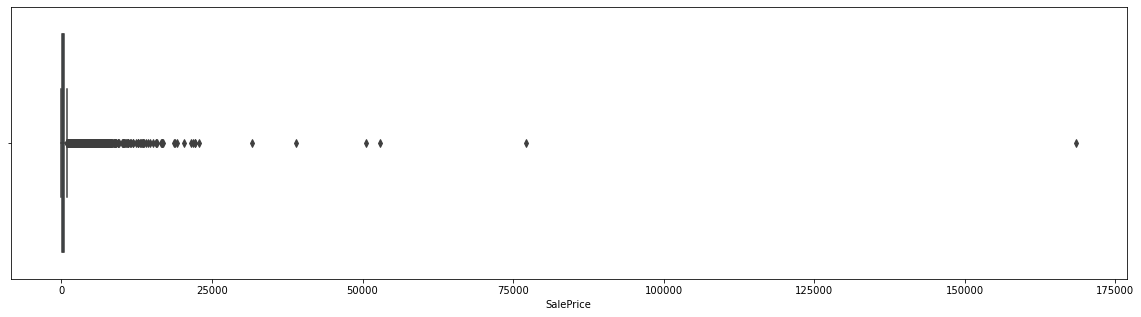

In [26]:
#Spread of transactions cost
plt.figure(figsize=(20,5))
sns.boxplot(x=sales['SalePrice'])
plt.show()

In [53]:
#Top10 best selling products
retail.Description.value_counts(ascending = False, normalize = True).head(10)

WHITE HANGING HEART T-LIGHT HOLDER    0.004403
JUMBO BAG RED RETROSPOT               0.004018
REGENCY CAKESTAND 3 TIER              0.003824
PARTY BUNTING                         0.003237
LUNCH BAG RED RETROSPOT               0.003012
ASSORTED COLOUR BIRD ORNAMENT         0.002812
SET OF 3 CAKE TINS PANTRY DESIGN      0.002652
PACK OF 72 RETROSPOT CAKE CASES       0.002576
LUNCH BAG  BLACK SKULL.               0.002479
NATURAL SLATE HEART CHALKBOARD        0.002391
Name: Description, dtype: float64

In [62]:
#items that generate greater profits for trade
retail.groupby('Description', as_index=False)['UnitPrice'].agg(['count','sum']).sort_values(by='sum', ascending=False).head(5)

,count,sum
Description,,
DOTCOM POSTAGE,706,206248.77
Manual,317,74101.28
POSTAGE,1126,34992.23
REGENCY CAKESTAND 3 TIER,2007,28065.76
AMAZON FEE,2,13761.09


In [50]:
#ID from costumers who buy the most
sales[sales['CustomerID'] != 'UNKNOW'].groupby('CustomerID', as_index=False)['SalePrice'].sum().sort_values(by='SalePrice',ascending=False).head(10)

,CustomerID,SalePrice
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194390.79
3008,16446.0,168472.50
1879,14911.0,143711.17
55,12415.0,124914.53
1333,14156.0,117210.08
3771,17511.0,91062.38
2702,16029.0,80850.84
0,12346.0,77183.60


## Task 4. Data Analysis

- Trade sales are concentrated in the United Kingdom (+90%) with small partitions from the Netherlands, Belgium, France, Germany and Ireland among others. 

- The transaction record provided does not include only records related to sales, for this exercise it was decided to assume that sales corresponded to records with a unit price and quantity greater than zero.

- In relation to the transaction dates, records were found from December 2010 to December 2011. During 2011, a gradual increase in sales was found between January and November, where the highest number of transactions and the highest invoice amount occurred. 

- In the month of December there was a drastic drop in trade sales, even lower compared to the previous year and month (2010-12) with a drop of approximately 200.000.

- On Saturdays, there are no sales at the store, during the week there are more than 3,000 transactions per day and on Sundays the number is reduced to approximately half.

- In general, the use of the store's website remains at a good level, increasing progressively from 8 am to noon when it begins to decrease until reaching a little more than 500 transactions at 5 pm. The sales amount is highest between 10 am and 3 pm. 
- Customers who made the most purchases at the store spent between 280000 and 78000. 

- Based on the assumptions made for this analysis, if 'DOTCOM POSTAGE' was an item sold by the store, it was the top selling item (706 units) between 2010-12 and 2011-12 and generated a total revenue of 206,248.77.

- The store offers a wide variety of products with prices ranging from 0.38 to 168000.
